In [ ]:
import pandas as pd
import re
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import math,random

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
%cd /content/drive/MyDrive/Kagsot/

Mounted at /content/drive/
/content/drive/MyDrive/Kagsot


In [ ]:
tb=pd.read_csv('trainbasekagsot.csv')
tbtm=pd.read_csv('test_base_&_train_metakagsot.csv')
tm=pd.read_csv('test_metakagsot.csv')
# r=pd.read_csv('realnews_collected_by_us.csv')
# trst=pd.concat([tst,r])

In [ ]:
tr=pd.read_csv('subsetforbagkagsot.csv')
tst=pd.read_csv('testforbagkagsot.csv')

In [ ]:
# trb.head(2)
# tbtm.head(2)
tr=tr.dropna()
tr['label']=tr['label'].astype(int)
tst=tst.dropna()
tst['label']=tst['label'].astype(int)


<ipython-input-4-280cfc754ed4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tr['label']=tr['label'].astype(int)


In [ ]:
tr.head(2)

,text,label
0,Major Voter Fraud Already Running Rampant Agai...,1
2,"Alaska, Reliant on Air Transit, Faces Pilot Sh...",0


In [ ]:
sz=len(tr)
def modifydatabag(t1):
  res=[]
  a=int(sz*0.80)
  start=0
  end=len(t1)
  for i in range(a):
    res.append(t1.iloc[random.randrange(start,end)])
  return res
#pass only test dataset for modification
data=modifydatabag(tr)


In [ ]:

df =pd.DataFrame(data,columns=['text','label'])
df['title_text']=df['text']
df.head(2)

,text,label,title_text
15574,Saudi Arabia Warns of Economic Fallout if Cong...,0,Saudi Arabia Warns of Economic Fallout if Cong...
10785,Exclusive—Sarah Palin Condemns ’Sick Audacity’...,1,Exclusive—Sarah Palin Condemns ’Sick Audacity’...


In [ ]:
df=tr

In [ ]:
tb=tb.dropna()
tbtm=tbtm.dropna()
tm=tm.dropna()

In [ ]:
tb.head(22)

,text,label,title_text
0,Government Gave Brown University $5 Million to...,1,government gave brown university 5 million to ...
1,TOP BRITISH GENERAL WARNS OF NUCLEAR WAR WITH ...,1,top british general warns of nuclear war with ...
2,"As Race Tightens, Clinton Campaign Is Counting...",1,as race tightens clinton campaign is counting ...
3,Trump’s Inaugural Parade Lineup: Border Patrol...,0,trumps inaugural parade lineup border patrol p...
4,Tim Kaine’s Son Arrested for Alleged Role in M...,0,tim kaines son arrested for alleged role in mi...
5,"Donald Trump Defeats Hillary Clinton, Wins 201...",1,donald trump defeats hillary clinton wins 2016...
6,WATCH: Trump Promises To ‘Teach’ Military Expe...,1,watch trump promises to teach military experts...
7,Ruined Serbian Orthodox Church Was a Landmark ...,0,ruined serbian orthodox church was a landmark ...
8,Louisiana Floods Lead to 8 Deaths - The New Yo...,0,louisiana floods lead to 8 deaths the new yor...
9,Show biz: Business and breakthroughs Show biz:...,1,show biz business and breakthroughs show biz b...


In [ ]:

def make_confusion_matrix(cf, group_names=None, categories='auto', count=True, percent=True, cbar=True, xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):

    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])

    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')
    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False

    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=(8,6))
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

    if title:
        plt.title(title)


df=tb
df_test=tm

df['title_text']=df['text']
df_test['title_text']=df_test['text']
def preprocessor(text):
    text=str(text)
    text = re.sub('<[^>]*>', '', text)
    text = re.sub(r'[^\w\s]','', text)
    text = text.lower()
    

    return text

df['title_text'] = df['title_text'].apply(preprocessor)
df_test['title_text'] = df_test['title_text'].apply(preprocessor)
porter = PorterStemmer()

def tokenizer_porter(text):
    return [porter.stem(word) for word in text.split()]



In [ ]:
tfidf = TfidfVectorizer(strip_accents=None,
                        lowercase=False,
                        preprocessor=None,
                        tokenizer=tokenizer_porter,
                        use_idf=True,
                        norm='l2',
                        smooth_idf=True
                       )
X_data=np.concatenate((df['title_text'],df_test['title_text']),axis=0)
tfidf.fit(X_data)
X_train=tfidf.transform(df['title_text'])
y_train = df['label'].values
X_test= tfidf.transform(df_test['title_text'])
y_test = df_test['label'].values
#X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.50, random_state=0)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 11.3min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 11.3min finished


Accuracy with SVM: 0.9356863839285714
              precision    recall  f1-score   support

         0.0       0.94      0.93      0.94      7324
         1.0       0.93      0.94      0.93      7012

    accuracy                           0.94     14336
   macro avg       0.94      0.94      0.94     14336
weighted avg       0.94      0.94      0.94     14336

Confusion matrix: 
[[6844  480]
 [ 442 6570]]


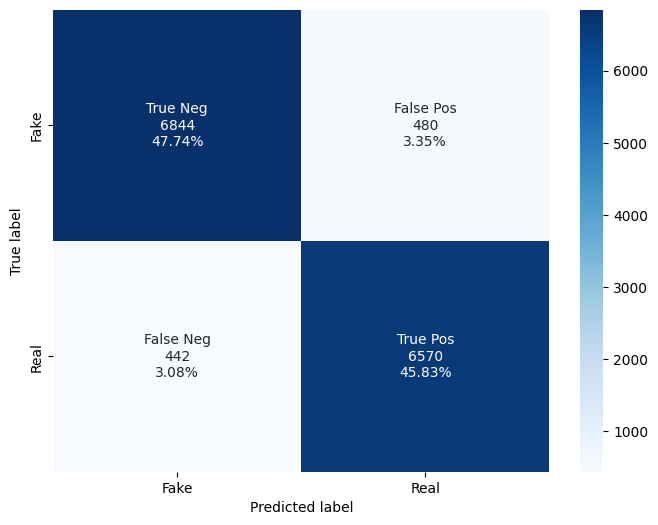

In [ ]:


# Using SVM as the classifier with a linear kernel and the regularization parameter C set to 1.
import warnings
warnings.filterwarnings("ignore")
clf = LogisticRegressionCV(cv=5, scoring='accuracy', random_state=0, n_jobs=-1, verbose=2, max_iter=300).fit(X_train, y_train)

#Evaluate the performance.
clf.score(X_test, y_test)
y_pred = clf.predict(X_test)
print("Accuracy with SVM: {}".format(accuracy_score(y_test, y_pred)))
print(classification_report(y_test, y_pred))

binary_predictions = []

for i in y_pred:
    if i >= 0.5:
        binary_predictions.append(1)
    else:
        binary_predictions.append(0)

resdf = pd.DataFrame(binary_predictions, columns=['label'])
# resdf.to_csv('lgvotkag.csv', index=False)
# Generate confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

print('Confusion matrix: ')
print(confusion_mat)

labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Fake', 'Real']

make_confusion_matrix(confusion_mat, group_names=labels, categories=categories, cmap='Blues')

In [ ]:

testmetakagsot=pd.DataFrame()


In [ ]:

# v=pd.read_csv('votkagsot.csv')
testmetakagsot['lg']=resdf['label']
# print(v)

In [ ]:
testmetakagsot.to_csv('testmetakagsot.csv',index=False)

In [ ]:
print(testmetakagsot)

       svm  nb  lg
0        0   0   0
1        1   0   1
2        0   0   0
3        1   1   1
4        1   1   1
...    ...  ..  ..
14331    0   0   0
14332    1   0   1
14333    1   1   1
14334    0   0   0
14335    0   0   0

[14336 rows x 3 columns]


In [ ]:
a=pd.read_csv('trainmetakagsot.csv')
print(a)

       svm  nb  lg
0        1   1   1
1        1   1   1
2        1   1   1
3        1   1   1
4        1   0   1
...    ...  ..  ..
17519    0   0   0
17520    0   0   0
17521    1   1   1
17522    1   1   1
17523    0   0   0

[17524 rows x 3 columns]
